In [1]:
# import libraries
import re
import os
import numpy as np
import pandas as pd
import requests
from requests.auth import HTTPBasicAuth
from getpass import getpass
import GetOldTweets3 as got
import pandas as pd
import csv
import tweepy
import wordcloud
import matplotlib.pyplot as plt
import seaborn as sns
import this

os.getcwd()
os.listdir()

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


['multiTimeline.csv',
 'tweetscount.ipynb',
 'virus.ipynb',
 'multiTimeline2.csv',
 'README.md',
 'virus-Copy2.ipynb',
 'final.ipynb',
 'virusds.csv',
 'geoMap.csv',
 'google_trend_country.ipynb',
 '.ipynb_checkpoints',
 'virus-Copy1.ipynb']

In [2]:
# to get pandas to show 999 rows of the dataframes
#pd.options.display.max_rows = 999

In [3]:
# loading ds into dataframe
virus = pd.read_csv("virusds.csv")

In [4]:
# documentation 
"""
Sno —> Serial number —> int
Date —> Date and time of observation —> date
Province/State —> Province or State of observation —> str
Country —> Country of observation —> str
Last Update —> Last update date of the row in UTC -> date
Confirmed —> Number of confirmed cases —> decimal
Deaths —> Number of deaths —> decimal
Recovered —> Number of recovered cases —> decimal
"""
virus.head(10)

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,2020-01-22 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,2020-01-22 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,2020-01-22 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,2020-01-22 12:00:00,0.0,0.0,0.0
5,6,01/22/2020 12:00:00,Guangdong,China,2020-01-22 12:00:00,26.0,0.0,0.0
6,7,01/22/2020 12:00:00,Guangxi,China,2020-01-22 12:00:00,2.0,0.0,0.0
7,8,01/22/2020 12:00:00,Guizhou,China,2020-01-22 12:00:00,1.0,0.0,0.0
8,9,01/22/2020 12:00:00,Hainan,China,2020-01-22 12:00:00,4.0,0.0,0.0
9,10,01/22/2020 12:00:00,Hebei,China,2020-01-22 12:00:00,1.0,0.0,0.0


In [5]:
virus.shape

(700, 8)

In [6]:
virus.describe()

,Sno,Confirmed,Deaths,Recovered
count,700.00000,700.000000,700.000000,700.000000
mean,350.50000,141.224286,3.077143,3.407143
std,202.21688,859.834237,27.759694,22.586377
min,1.00000,0.000000,0.000000,0.000000
25%,175.75000,2.000000,0.000000,0.000000
50%,350.50000,8.000000,0.000000,0.000000
75%,525.25000,55.250000,0.000000,1.000000
max,700.00000,13522.000000,414.000000,396.000000


In [7]:
# checking how prevalent missing values are in the data
# defining a function to check null values and null values %:
def null_cols(ds):
    """
    Checks whether the value in each field is missing (null) and return either 
    True or False for each field, totaling up the number of True values by column.

    Then does the same, but returns the value as a percentage. Useful to decide where 
    to drop.
    """
    
    return ds.isnull().sum(), ds.isna().mean().round(4) * 100

In [8]:
nulls_abs, nulls_rel = null_cols(virus)

In [9]:
# 164 in Provice/State
nulls_abs

Sno                 0
Date                0
Province/State    164
Country             0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
dtype: int64

In [10]:
# Province/State 23,43% null valls
nulls_rel

Sno                0.00
Date               0.00
Province/State    23.43
Country            0.00
Last Update        0.00
Confirmed          0.00
Deaths             0.00
Recovered          0.00
dtype: float64

In [11]:
# Checking Unique entries per colum:
[col + ": " + str(len(virus[col].unique())) + " uniques" for col in virus]

['Sno: 700 uniques',
 'Date: 13 uniques',
 'Province/State: 57 uniques',
 'Country: 31 uniques',
 'Last Update: 92 uniques',
 'Confirmed: 183 uniques',
 'Deaths: 15 uniques',
 'Recovered: 36 uniques']

In [12]:
# Checking Unique "Countries"
virus["Country"].unique()

array(['China', 'US', 'Japan', 'Thailand', 'South Korea',
       'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka',
       'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates',
       'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK'], dtype=object)

In [13]:
# duplicating the data
c_virus = virus.copy()

# correcting China entries
c_virus["Country"] = c_virus["Country"].str.replace('Mainland China', 'China')
c_virus["Country"] = c_virus["Country"].str.replace('Hong Kong', 'China')
#c_virus["Country"] = c_virus["Country"].str.replace('Taiwan', 'China') // We decided to 
# keep Taiwan as a Country instead of a Province of 'China'.
c_virus["Country"] = c_virus["Country"].str.replace(' China', 'China')
c_virus["Country"] = c_virus["Country"].str.replace('Macau', 'China')
c_virus["Country"].unique()

array(['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Taiwan',
       'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia',
       'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia',
       'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland',
       'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia',
       'Spain', 'UK'], dtype=object)

In [14]:
# Correcting 'Taiwan as a country' (1 entry)
c_virus[(c_virus["Province/State"] == "Taiwan") & (c_virus["Country"] != "Taiwan")]
c_virus.loc[(c_virus["Province/State"] == "Taiwan") & (c_virus["Country"] != "Taiwan"), "Country"] = "Taiwan"

In [15]:
c_virus[(c_virus["Province/State"] == "Taiwan") & (c_virus["Country"] != "Taiwan")]

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered


In [16]:
# checking the unique Last Updates
c_virus["Last Update"].unique()

array(['2020-01-22 12:00:00', '2020-01-23 12:00:00',
       '2020-01-24 12:00:00', '2020-01-24 16:00:00',
       '2020-01-25 22:00:00', '2020-01-25 12:00:00',
       '2020-01-26 23:00:00', '2020-01-27 20:30:00',
       '2020-01-28 23:00:00', '2020-01-28 18:00:00',
       '2020-01-29 21:00:00', '2020-01-30 21:30:00',
       '2020-01-31 19:00:00', '2020-01-02 23:33:00',
       '2020-02-02 02:13:00', '2020-02-02 01:23:00',
       '2020-02-02 00:53:00', '2020-02-02 01:53:00',
       '2020-02-02 01:33:00', '2020-01-02 23:43:00',
       '2020-02-02 01:13:00', '2020-02-02 01:03:00',
       '2020-02-02 03:05:00', '2020-02-02 00:23:00',
       '2020-02-02 03:43:00', '2020-02-02 03:23:00',
       '2020-02-02 02:53:00', '2020-01-02 15:53:00',
       '2020-01-02 15:23:00', '2020-02-02 02:03:00',
       '2020-01-02 15:43:00', '2020-02-02 01:43:00',
       '2020-02-02 02:33:00', '2020-02-02 00:43:00',
       '2020-01-02 18:53:00', '2020-01-31 10:37:00',
       '2020-02-02 02:23:00', '2020-01-31 15:2

In [17]:
# Removing Time (hh:mm:ss) from the 'Last Update' col
# Learned the pd.to_datetime(df['date']).dt.date method the next morning XD
def time_eater(entity):
    """
    Checks if an entity has a time after a date, and removes the time.
    """
    return re.sub("\s+\d{1,2}\:\d{2}:\d{2}", "", entity)

In [18]:
# applies the time_eater function to the 'Last Update' col to clean the time
c_virus["Last Update"] = c_virus["Last Update"].apply(time_eater)


In [19]:
c_virus["Last Update"].unique()

array(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
       '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
       '2020-01-30', '2020-01-31', '2020-01-02', '2020-02-02',
       '2020-03-02', '2020-04-02'], dtype=object)

In [20]:
# Clean 'Date' as done for 'Last Update'
c_virus["Date"] = c_virus["Date"].apply(time_eater)

In [21]:
# Need to change the format of 'Date' so that it has 'Last Update' (YYYY-MM-DD)
c_virus["Date"] = pd.to_datetime(c_virus["Date"])

# Setting 'Last Update' in Timestamp format as well
c_virus["Last Update"] = pd.to_datetime(c_virus["Last Update"])

In [22]:
# After analysis, we reached the decision of dropping the 'Last Update', since the 'Dates'
# correspond to real world dates.
c_virus.drop("Last Update", axis = 1, inplace = True)

In [23]:
# Now to drop the rows from 03/02/2020 onwards
drop_late_dates = c_virus[c_virus["Date"] > "02/02/2020"]
c_virus.drop(drop_late_dates.index, axis = 0, inplace = True)

In [24]:
c_virus

,Sno,Date,Province/State,Country,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,China,1.0,0.0,0.0
1,2,2020-01-22,Beijing,China,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,China,6.0,0.0,0.0
3,4,2020-01-22,Fujian,China,1.0,0.0,0.0
4,5,2020-01-22,Gansu,China,0.0,0.0,0.0
...,...,...,...,...,...,...,...
626,627,2020-02-02,"Boston, MA",US,1.0,0.0,0.0
627,628,2020-02-02,"Los Angeles, CA",US,1.0,0.0,0.0
628,629,2020-02-02,"Orange, CA",US,1.0,0.0,0.0
629,630,2020-02-02,"Seattle, WA",US,1.0,0.0,0.0


In [25]:
# Grouping by 'Date'
multi_group = c_virus.groupby(["Date"],as_index = False)[["Province/State", "Country", "Confirmed","Deaths", "Recovered"]].agg('sum')

In [26]:
multi_group

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,555.0,0.0,0.0
1,2020-01-23,653.0,18.0,30.0
2,2020-01-24,941.0,26.0,36.0
3,2020-01-25,2019.0,56.0,49.0
4,2020-01-26,2794.0,80.0,54.0
5,2020-01-27,4473.0,107.0,63.0
6,2020-01-28,6057.0,132.0,110.0
7,2020-01-29,7783.0,170.0,133.0
8,2020-01-30,9776.0,213.0,187.0
9,2020-01-31,11374.0,259.0,252.0


In [27]:
# loading google trends figures
gtrends = pd.read_csv("multiTimeline2.csv")

In [28]:
gtrends

,Date,Worldwide trend
0,2020-01-20,3
1,2020-01-21,13
2,2020-01-22,25
3,2020-01-23,32
4,2020-01-24,49
5,2020-01-25,61
6,2020-01-26,65
7,2020-01-27,70
8,2020-01-28,88
9,2020-01-29,83


In [29]:
# setting the date to Timestamp format
gtrends["Date"] = pd.to_datetime(gtrends["Date"])

In [30]:
# creating a small DF to concat everything, w/dates missing from the multigroup
dates_missing_mg = {'Date':  ['2020-01-20', '2020-01-21']
        }
df = pd.DataFrame (dates_missing_mg, columns = ['Date'])
df["Date"] = pd.to_datetime(df["Date"])

new_multi = pd.concat([df, multi_group], ignore_index = True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [31]:
new_multi

,Confirmed,Date,Deaths,Recovered
0,NaN,2020-01-20,NaN,NaN
1,NaN,2020-01-21,NaN,NaN
2,555.0,2020-01-22,0.0,0.0
3,653.0,2020-01-23,18.0,30.0
4,941.0,2020-01-24,26.0,36.0
5,2019.0,2020-01-25,56.0,49.0
6,2794.0,2020-01-26,80.0,54.0
7,4473.0,2020-01-27,107.0,63.0
8,6057.0,2020-01-28,132.0,110.0
9,7783.0,2020-01-29,170.0,133.0


In [32]:
# changing the colum order
new_multi = new_multi[["Date", "Confirmed", "Deaths", "Recovered"]]
new_multi

,Date,Confirmed,Deaths,Recovered
0,2020-01-20,NaN,NaN,NaN
1,2020-01-21,NaN,NaN,NaN
2,2020-01-22,555.0,0.0,0.0
3,2020-01-23,653.0,18.0,30.0
4,2020-01-24,941.0,26.0,36.0
5,2020-01-25,2019.0,56.0,49.0
6,2020-01-26,2794.0,80.0,54.0
7,2020-01-27,4473.0,107.0,63.0
8,2020-01-28,6057.0,132.0,110.0
9,2020-01-29,7783.0,170.0,133.0


In [33]:
# merging google trends with the c_virus dataframe
mergeddf = pd.merge(new_multi, gtrends, on = "Date",left_index = True, right_index = True, how = 'outer')

In [34]:
mergeddf

,Date,Confirmed,Deaths,Recovered,Worldwide trend
0,2020-01-20,NaN,NaN,NaN,3
1,2020-01-21,NaN,NaN,NaN,13
2,2020-01-22,555.0,0.0,0.0,25
3,2020-01-23,653.0,18.0,30.0,32
4,2020-01-24,941.0,26.0,36.0,49
5,2020-01-25,2019.0,56.0,49.0,61
6,2020-01-26,2794.0,80.0,54.0,65
7,2020-01-27,4473.0,107.0,63.0,70
8,2020-01-28,6057.0,132.0,110.0,88
9,2020-01-29,7783.0,170.0,133.0,83


In [35]:
#extracting tweets via getoldtweets
text_query = 'corona virus'
since_date = '2020-01-20'
until_date = '2020-02-03'
user = 'WHO'
count = 10000000000000
tweetCriteria = got.manager.TweetCriteria().setQuerySearch(text_query).setUsername(user).setSince(since_date).setUntil(until_date).setMaxTweets(count)
tweets = got.manager.TweetManager.getTweets(tweetCriteria)
text_tweets = [[tweet.date, tweet.text, tweet.retweets] for tweet in tweets]

In [36]:
# getting the tweet data into a dataframe
tweetsdf = pd.DataFrame(text_tweets)

In [37]:
# adding columns names
tweetsdf.columns = ['Date','Tweet', 'Retweet']

In [38]:
tweetsdf

,Date,Tweet,Retweet
0,2020-02-02 17:07:23+00:00,Q: Can regularly rinsing your nose with saline...,205
1,2020-02-02 15:34:58+00:00,Q: Can gargling mouthwash protect you from inf...,283
2,2020-01-30 20:11:47+00:00,The full statement by @DrTedros on IHR Emergen...,669
3,2020-01-30 18:10:27+00:00,WHO is proposing ‘2019-nCoV’ as an interim nam...,160
4,2020-01-30 18:08:54+00:00,Public health efforts are targeted at limiting...,98
...,...,...,...
119,2020-01-21 21:01:55+00:00,"On 20 January 2020, Republic of #Korea reporte...",108
120,2020-01-21 20:29:21+00:00,WHO situation report on novel #coronavirus (20...,593
121,2020-01-21 19:05:42+00:00,List of proposed members and advisers to Inter...,86
122,2020-01-20 17:59:06+00:00,The Emergency Committee on the novel #coronavi...,929


In [39]:
#sorting values by date
tweetsdf.sort_values('Date',ascending = True, inplace = True)
tweetsdf.head(200)

,Date,Tweet,Retweet
123,2020-01-20 17:54:10+00:00,BREAKING: WHO Director-General @DrTedros will ...,4412
122,2020-01-20 17:59:06+00:00,The Emergency Committee on the novel #coronavi...,929
121,2020-01-21 19:05:42+00:00,List of proposed members and advisers to Inter...,86
120,2020-01-21 20:29:21+00:00,WHO situation report on novel #coronavirus (20...,593
119,2020-01-21 21:01:55+00:00,"On 20 January 2020, Republic of #Korea reporte...",108
...,...,...,...
4,2020-01-30 18:08:54+00:00,Public health efforts are targeted at limiting...,98
3,2020-01-30 18:10:27+00:00,WHO is proposing ‘2019-nCoV’ as an interim nam...,160
2,2020-01-30 20:11:47+00:00,The full statement by @DrTedros on IHR Emergen...,669
1,2020-02-02 15:34:58+00:00,Q: Can gargling mouthwash protect you from inf...,283


In [40]:
# removing time from date
tweetsdf['Date'] = pd.to_datetime(tweetsdf['Date'])
tweetsdf['Date'] = [d.date() for d in tweetsdf['Date']]
tweetsdf.head(200)

,Date,Tweet,Retweet
123,2020-01-20,BREAKING: WHO Director-General @DrTedros will ...,4412
122,2020-01-20,The Emergency Committee on the novel #coronavi...,929
121,2020-01-21,List of proposed members and advisers to Inter...,86
120,2020-01-21,WHO situation report on novel #coronavirus (20...,593
119,2020-01-21,"On 20 January 2020, Republic of #Korea reporte...",108
...,...,...,...
4,2020-01-30,Public health efforts are targeted at limiting...,98
3,2020-01-30,WHO is proposing ‘2019-nCoV’ as an interim nam...,160
2,2020-01-30,The full statement by @DrTedros on IHR Emergen...,669
1,2020-02-02,Q: Can gargling mouthwash protect you from inf...,283


In [41]:
# condensing dates and adding up the number of retweets
condense = lambda a: "/".join(a)
finalds = tweetsdf.groupby(by = 'Date', as_index = False).agg({'Tweet': condense, 'Retweet': 'sum'})

In [42]:
# they did not tweet about the Corona Virus on the 24, 31 and 1st February, only retweeted
tweetsdf["Date"].unique()

array([datetime.date(2020, 1, 20), datetime.date(2020, 1, 21),
       datetime.date(2020, 1, 22), datetime.date(2020, 1, 23),
       datetime.date(2020, 1, 25), datetime.date(2020, 1, 26),
       datetime.date(2020, 1, 27), datetime.date(2020, 1, 28),
       datetime.date(2020, 1, 29), datetime.date(2020, 1, 30),
       datetime.date(2020, 2, 2)], dtype=object)

In [43]:
# Getting the number of tweets in a day
df_val_counts = pd.DataFrame(tweetsdf['Date'].value_counts().reset_index())

In [44]:
# Renaming the Columns
df_val_counts.columns = ['Date','tweets']

# Sorting by date
df_val_counts.sort_values(by='Date')

,Date,tweets
9,2020-01-20,2
7,2020-01-21,4
1,2020-01-22,31
0,2020-01-23,34
10,2020-01-25,1
6,2020-01-26,5
2,2020-01-27,15
4,2020-01-28,10
5,2020-01-29,8
3,2020-01-30,12


In [45]:
# Merging the tweets w/the retweets
tweetsfinal = pd.merge(df_val_counts, finalds, on = 'Date', left_index = True, right_index = False)

In [46]:
tweetsfinal

,Date,tweets,Tweet,Retweet
3,2020-01-23,34,Stay healthy while travelling! Avoid travellin...,10798
2,2020-01-22,31,The International Health Regulations Emergency...,6679
6,2020-01-27,15,Current estimates of the new #coronavirus (201...,12866
9,2020-01-30,12,The International Health Regulations Emergency...,2986
7,2020-01-28,10,WHO Director-General @DrTedros today met Presi...,3217
8,2020-01-29,8,Live from Geneva on the new #coronavirus outbr...,5197
5,2020-01-26,5,@Benzie135 Hi. Thank you for your query. For t...,3833
1,2020-01-21,4,List of proposed members and advisers to Inter...,1495
10,2020-02-02,2,Q: Can gargling mouthwash protect you from inf...,488
0,2020-01-20,2,BREAKING: WHO Director-General @DrTedros will ...,5341


In [47]:
# droping the tweet colums
tweetsfinal.drop(['Tweet'], axis = 1, inplace = True)

In [48]:
# converting Dates to datetime format
tweetsfinal["Date"] = pd.to_datetime(tweetsfinal["Date"])

In [49]:
# Merging mergeddf with tweetsfinal for our dataframe
outbreak_df = pd.merge(mergeddf, tweetsfinal, on = "Date", left_index = True, right_index = False, how = 'outer')

In [50]:
outbreak_df = outbreak_df.reset_index().drop(["index"], axis = 1)

In [51]:
# adding the Confirmed Cases for the 20 and 21st from the National Health Commission 
# daily reports found at https://en.wikipedia.org/wiki/2019–20_Wuhan_coronavirus_outbreak#cite_ref-BNO2020_62-0
outbreak_df["Confirmed"][0] = 294
outbreak_df["Confirmed"][1] = 444
outbreak_df["Deaths"][0] = 0
outbreak_df["Deaths"][1] = 0
outbreak_df["Recovered"][0] = 0
outbreak_df["Recovered"][1] = 0 #fill_na!!!!!!!!!!! (where tired)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [52]:
outbreak_df

,Date,Confirmed,Deaths,Recovered,Worldwide trend,tweets,Retweet
0,2020-01-20,294.0,0.0,0.0,3,2.0,5341.0
1,2020-01-21,444.0,0.0,0.0,13,4.0,1495.0
2,2020-01-22,555.0,0.0,0.0,25,31.0,6679.0
3,2020-01-23,653.0,18.0,30.0,32,34.0,10798.0
4,2020-01-24,941.0,26.0,36.0,49,NaN,NaN
5,2020-01-25,2019.0,56.0,49.0,61,1.0,4936.0
6,2020-01-26,2794.0,80.0,54.0,65,5.0,3833.0
7,2020-01-27,4473.0,107.0,63.0,70,15.0,12866.0
8,2020-01-28,6057.0,132.0,110.0,88,10.0,3217.0
9,2020-01-29,7783.0,170.0,133.0,83,8.0,5197.0


In [53]:
# Adding a col for the growth rate of the Confirmed Cases
outbreak_df["Confirmed Cases Rate"] = outbreak_df["Confirmed"].pct_change()

In [54]:
# rounding and converting to %
outbreak_df["Confirmed Cases Rate"] = round(outbreak_df["Confirmed Cases Rate"], 2)

In [55]:
# Adding a col for the growth rate of the Deaths
outbreak_df["Deaths Rate"] = outbreak_df["Deaths"].pct_change()

# rounding and converting to %
outbreak_df["Deaths Rate"] = round(outbreak_df["Deaths Rate"], 2)

In [56]:
# Adding a col for the relationship between Tweets and ReTweets
outbreak_df["Retweets per Tweet"] = round(outbreak_df["Retweet"] / outbreak_df["tweets"], 2)

In [57]:
# Adding a col for the growth rate of the Rt/T
outbreak_df["Rt/T Rate"] = outbreak_df["Retweets per Tweet"].pct_change()

# rounding and converting to %
outbreak_df["Rt/T Rate"] = round(outbreak_df["Rt/T Rate"], 2)

In [58]:
# Adding 'Week Day' >>> Not using it afterall
#outbreak_df["Week Day"] = outbreak_df["Date"].dt.day_name()

In [59]:
# TODO: Deal with infinity: "We're in the sububrs, not in infinity".

In [60]:
# Changing column names
outbreak_df = outbreak_df.rename (columns = {'Worldwide trend': 'Google Trends', 'tweets': 'Tweets', 'Retweet': 'Retweets', 'Confirmed Cases Rate': 'Confirmed Progression', 'Deaths Rate': 'Daily Death Progression', 'Rt/T Rate': 'Retweets per Tweet Progression'})

In [61]:
# Filling NaN and  inf w/0 on Retweets, CP, DDP and in RT p/T
outbreak_df = outbreak_df.fillna(0)

In [80]:
# creating a corrolation matrix
corrMatrix = round(outbreak_df.corr(), 2)

In [63]:
outbreak_df

,Date,Confirmed,Deaths,Recovered,Google Trends,Tweets,Retweets,Confirmed Progression,Daily Death Progression,Retweets per Tweet,Retweets per Tweet Progression
0,2020-01-20,294.0,0.0,0.0,3,2.0,5341.0,0.00,0.00,2670.50,0.00
1,2020-01-21,444.0,0.0,0.0,13,4.0,1495.0,0.51,0.00,373.75,-0.86
2,2020-01-22,555.0,0.0,0.0,25,31.0,6679.0,0.25,0.00,215.45,-0.42
3,2020-01-23,653.0,18.0,30.0,32,34.0,10798.0,0.18,inf,317.59,0.47
4,2020-01-24,941.0,26.0,36.0,49,0.0,0.0,0.44,0.44,0.00,0.00
5,2020-01-25,2019.0,56.0,49.0,61,1.0,4936.0,1.15,1.15,4936.00,14.54
6,2020-01-26,2794.0,80.0,54.0,65,5.0,3833.0,0.38,0.43,766.60,-0.84
7,2020-01-27,4473.0,107.0,63.0,70,15.0,12866.0,0.60,0.34,857.73,0.12
8,2020-01-28,6057.0,132.0,110.0,88,10.0,3217.0,0.35,0.23,321.70,-0.62
9,2020-01-29,7783.0,170.0,133.0,83,8.0,5197.0,0.28,0.29,649.62,1.02


In [81]:
corrMatrix

,Confirmed,Deaths,Recovered,Google Trends,Tweets,Retweets,Confirmed Progression,Daily Death Progression,Retweets per Tweet,Retweets per Tweet Progression
Confirmed,1.00,1.00,0.98,0.64,-0.37,-0.47,-0.27,-0.12,-0.34,-0.16
Deaths,1.00,1.00,0.97,0.68,-0.38,-0.46,-0.24,-0.07,-0.33,-0.14
Recovered,0.98,0.97,1.00,0.51,-0.37,-0.50,-0.26,-0.10,-0.31,-0.13
Google Trends,0.64,0.68,0.51,1.00,-0.24,-0.22,0.09,0.31,-0.22,0.04
Tweets,-0.37,-0.38,-0.37,-0.24,1.00,0.71,-0.19,-0.30,-0.23,-0.19
Retweets,-0.47,-0.46,-0.50,-0.22,0.71,1.00,0.13,0.10,0.22,0.10
Confirmed Progression,-0.27,-0.24,-0.26,0.09,-0.19,0.13,1.00,0.84,0.62,0.80
Daily Death Progression,-0.12,-0.07,-0.10,0.31,-0.30,0.10,0.84,1.00,0.68,0.87
Retweets per Tweet,-0.34,-0.33,-0.31,-0.22,-0.23,0.22,0.62,0.68,1.00,0.87
Retweets per Tweet Progression,-0.16,-0.14,-0.13,0.04,-0.19,0.10,0.80,0.87,0.87,1.00


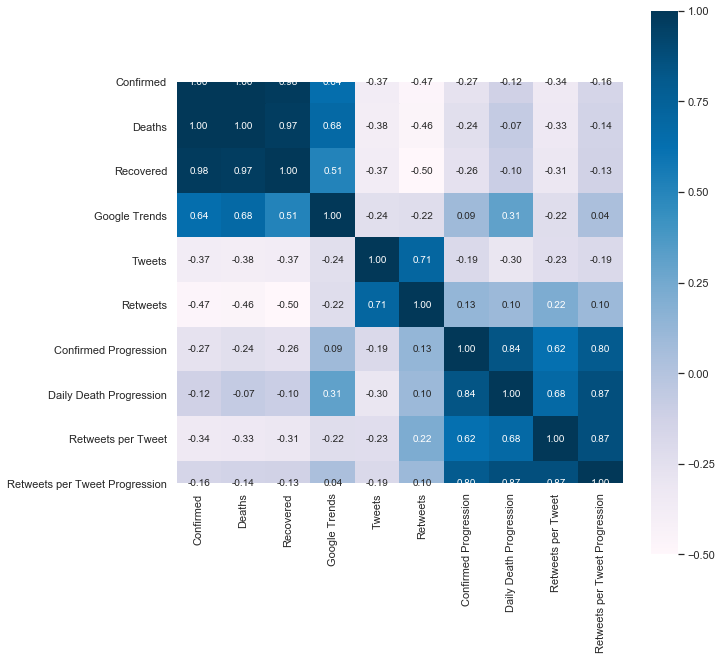

In [242]:
# Creating a Correlation Matrix Heatmap to better visualize the corr coefficients
sns.set()
sns.axes_style()
fig, ax = plt.subplots(figsize = (10, 10))
matrix_plot = sns.heatmap(corrMatrix, xticklabels = True, yticklabels = True, annot = True, 
            annot_kws={"size": 10}, cmap = "PuBu", center = None, square = True, fmt="1.2f")

# Saving the Matrix into a png.
img_matrix = matrix_plot.get_figure()    
img_matrix.savefig("corr_matrix.png", transparent = True, dpi = 400)

# As a note: using 'yticklabels = True', the top and bottom of the heatmap get cut off. We
# couldn't find a solution for this in time, so we printed the image w/out it and added
# in the presentation. With more time we would get everything working here.

In [187]:
# Correlation Matrix table of the Confirmed cases, Google Trends and Deaths
google = outbreak_df[["Confirmed", "Google Trends", "Deaths"]].corr()
round(google, 2)

,Confirmed,Google Trends,Deaths
Confirmed,1.00,0.64,1.00
Google Trends,0.64,1.00,0.68
Deaths,1.00,0.68,1.00


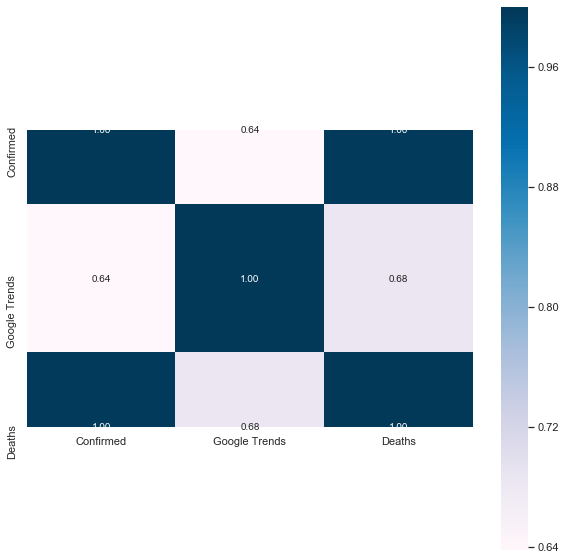

In [216]:
# Corr Matrix Heatmap for the google Matrix
sns.axes_style()
fig, ax = plt.subplots(figsize = (10, 10))
google_plot = sns.heatmap(google, xticklabels = True, yticklabels = True, annot = True, 
            annot_kws={"size": 10}, cmap = "PuBu", square = True, fmt="1.2f")

# Saving the google matrix png
img_matrix = google_plot.get_figure()    
img_matrix.savefig("google.png", transparent = True, dpi = 400)

In [188]:
# Correlation Matrix table of the Confirmed Progression, Daily Death Progression", and
# "Retweets per Tweet Progression"
twitter = outbreak_df[["Confirmed Progression", "Daily Death Progression", "Retweets per Tweet Progression"]].corr()
round(twitter, 2)

,Confirmed Progression,Daily Death Progression,Retweets per Tweet Progression
Confirmed Progression,1.00,0.84,0.80
Daily Death Progression,0.84,1.00,0.87
Retweets per Tweet Progression,0.80,0.87,1.00


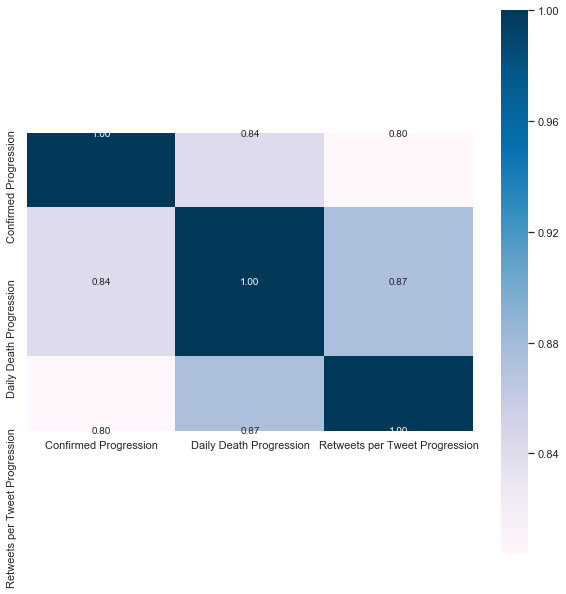

In [218]:
# Corr Matrix Heatmap for the google Matrix
sns.axes_style()
fig, ax = plt.subplots(figsize = (10, 10))
twitter_plot = sns.heatmap(twitter, xticklabels = True, yticklabels = True, annot = True, 
            annot_kws={"size": 10}, cmap = "PuBu", square = True, fmt="1.2f")

# Saving the twitter matrix png
img_matrix = twitter_plot.get_figure()    
img_matrix.savefig("twitter.png", transparent = True, dpi = 400)